In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

plt.rc('font', family='gulim')  # malgun

In [101]:
np.random.seed(567)
tf.random.set_seed(567)

In [102]:
from keras.models import Model, Sequential
from keras.layers import Input, Dense, LSTM, Embedding
from keras.optimizers import Adam

# from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# from sklearn.feature_extraction.text import TfidfVectorizer

In [103]:
df = pd.read_excel('전처리_품사_불용어.xlsx')
df.head()

,Emotion,Sentence_cleaned
0,공포,"['부르', '맞', '동생', '언니']"
1,공포,['느낌']
2,공포,['초기']
3,공포,"['유치원', '낫', '버스', '사고']"
4,공포,['맞']


In [104]:
df['Sentence_cleaned'] = df['Sentence_cleaned'].apply(lambda i: [i.strip('[\'').strip('\']').split('\', \'')][0])

In [105]:
sentences = df['Sentence_cleaned'].to_list()
sentences

[['부르', '맞', '동생', '언니'],
 ['느낌'],
 ['초기'],
 ['유치원', '낫', '버스', '사고'],
 ['맞'],
 ['친구', '남자'],
 ['허리'],
 ['꾸', '불안'],
 ['남'],
 ['시', '먹', '좋', '약'],
 ['남', '활동', '활용', '구직'],
 ['괜찮', '조급'],
 ['스타일', '바꾸', '어색'],
 ['술집', '법', '문제', '아내', '여자'],
 ['지', '소리'],
 ['듣', '말', '학업', '가요', '관련', '잡다', '좋'],
 ['가격', '반값', '질'],
 ['말씀', '올라가', '도', '글', '요의', '베스트', '실시간', '친구', '남자', '마지막'],
 ['회사', '젊', '많', '걱정', '여자', '화장품'],
 ['몸무게'],
 ['다리', '가요'],
 ['가요', '정도'],
 ['오래가', '보통', '콩'],
 ['짜증', '전화', '술', '여자'],
 ['걱정'],
 ['증상'],
 ['걱정', '동생'],
 ['무리'],
 ['애인', '걱정'],
 ['전', '나오'],
 ['경고', '먹'],
 ['예민', '상태', '불안', '극도'],
 ['어떡', '받'],
 ['하수', '안검'],
 ['사마귀', '일수'],
 ['내년', '고민', '여대생'],
 ['가요', '좋'],
 ['방법', '자제'],
 ['물거품', '집', '걱정', '운동', '노력'],
 ['옳', '모르', '선택'],
 ['조급', '태어나', '마음'],
 ['엄마', '들키', '친구'],
 ['구글', '동기', '어쩌', '계정', '폰'],
 ['빼'],
 ['물', '먹', '그러'],
 ['찾아가'],
 ['들어가'],
 ['방법'],
 ['좋', '짱박'],
 ['기분', '싸가', '첫날'],
 ['들어가', '군대'],
 ['방법'],
 ['고민'],
 ['발달', '장애', '행동', '검색'],
 ['

In [106]:
# 토큰화된 리스트를 문자열로 변환
sentences_str = [' '.join(tokens) for tokens in sentences]

# 임시 토크나이저로 시퀀스 생성하여 최대 인덱스 확인
temp_tokenizer = Tokenizer(oov_token='<OOV>')
temp_tokenizer.fit_on_texts(sentences_str)
temp_sequences = temp_tokenizer.texts_to_sequences(sentences_str)

# vocab_size 계산
max_index = max([max(seq) for seq in temp_sequences])
vocab_size = max_index + 1
print("최대 단어 인덱스:", max_index)
print("설정할 vocab_size:", vocab_size)

# 실제 사용할 토크나이저 설정
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences_str)

# 최종 시퀀스 생성
sequences = tokenizer.texts_to_sequences(sentences_str)

최대 단어 인덱스: 17493
설정할 vocab_size: 17494


시퀀스 길이 통계:
평균 길이: 3.56
중앙값: 3.00
최대 길이: 55
최소 길이: 1


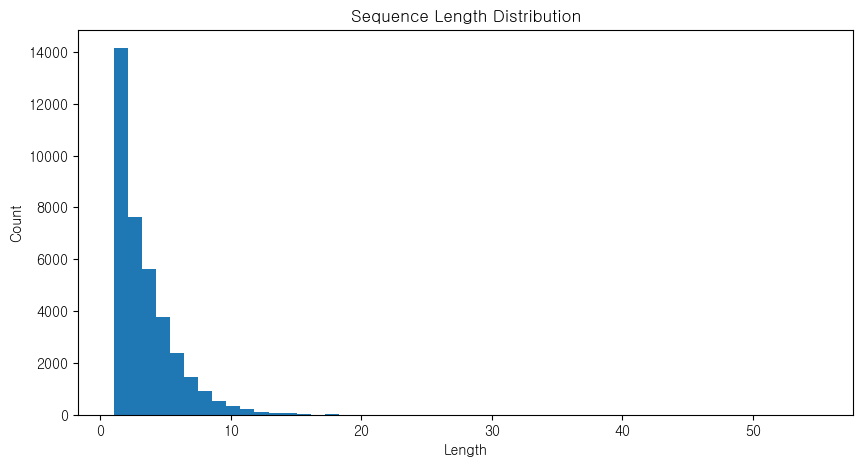

설정된 max_length: 8
패딩 후 시퀀스 형태: (37235, 8)


In [118]:
# 시퀀스 길이 분포 확인
sequence_lengths = [len(seq) for seq in sequences]
print("시퀀스 길이 통계:")
print(f"평균 길이: {np.mean(sequence_lengths):.2f}")
print(f"중앙값: {np.median(sequence_lengths):.2f}")
print(f"최대 길이: {max(sequence_lengths)}")
print(f"최소 길이: {min(sequence_lengths)}")

# 시퀀스 길이 분포 시각화
plt.figure(figsize=(10, 5))
plt.hist(sequence_lengths, bins=50)
plt.title('Sequence Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.show()

# 적절한 max_length 설정 (예: 95퍼센타일 또는 평균 + 2*표준편차)
max_length = int(np.percentile(sequence_lengths, 95))  # 95퍼센타일
# 또는
# max_length = int(np.mean(sequence_lengths) + 2 * np.std(sequence_lengths))

print(f"설정된 max_length: {max_length}")

# 시퀀스 길이 제한 및 패딩
padded_sequences = pad_sequences(
    sequences,
    maxlen=max_length,
    padding='post',
    truncating='post'  # 긴 시퀀스는 뒷부분을 자름
)

print(f"패딩 후 시퀀스 형태: {padded_sequences.shape}")

In [120]:
# 단어 사전 확인
word_index = tokenizer.word_index
print(f"총 단어 수: {len(word_index)}")
print("\n단어 인덱스 매핑:")
print(word_index)

# 시퀀스 확인
print("\n시퀀스 변환 결과:")
print(sequences)

# 패딩된 시퀀스 확인
print("\n패딩 적용 결과:")
print(padded_sequences)

총 단어 수: 17493

단어 인덱스 매핑:
{'<OOV>': 1, '좋': 2, '사람': 3, '말': 4, '나라': 5, '받': 6, '생각': 7, '많': 8, '먹': 9, '알': 10, '돈': 11, '국민': 12, '여자': 13, '남자': 14, '감사': 15, '친구': 16, '모르': 17, '살': 18, '맞': 19, '대통령': 20, '쓰': 21, '나오': 22, '기사': 23, '한국': 24, '죽': 25, '개': 26, '애': 27, '축하': 28, '박근혜': 29, '일본': 30, '걱정': 31, '정도': 32, '삼성': 33, '힘들': 34, '인간': 35, '남': 36, '중국': 37, '대단': 38, '선수': 39, '미국': 40, '실': 41, '집': 42, '전': 43, '잡': 44, '문제': 45, '댓글': 46, '고민': 47, '끝': 48, '만들': 49, '쓰레기': 50, '마음': 51, '앞': 52, '새끼': 53, '그러': 54, '대한민국': 55, '주': 56, '싫': 57, '최고': 58, '날': 59, '얼굴': 60, '오빠': 61, '연기': 62, '믿': 63, '사랑': 64, '입': 65, '글': 66, '최순': 67, '기자': 68, '형': 69, '닭': 70, '무섭': 71, '눈': 72, '응원': 73, '소리': 74, '차': 75, '법': 76, '보이': 77, '연락': 78, '파이팅': 79, '정신': 80, '사진': 81, '욕': 82, '탄핵': 83, '진심': 84, '모습': 85, '트럼프': 86, '미안': 87, '팬': 88, '대박': 89, '그렇': 90, '박': 91, '시작': 92, '치': 93, '이러': 94, '머리': 95, '정부': 96, '비': 97, '폰': 98, '국가': 99, '물': 100, '달': 101,

In [121]:
categories = set(df['Emotion'].to_list())
categories

{'공포', '놀람', '분노', '슬픔', '중립', '행복', '혐오'}

In [122]:
def category_encode(category):
    if category == '공포':
        return [1, 0, 0, 0, 0, 0, 0]
    elif category == '놀람':
        return [0, 1, 0, 0, 0, 0, 0]
    elif category == '분노':
        return [0, 0, 1, 0, 0, 0, 0]
    elif category == '슬픔':
        return [0, 0, 0, 1, 0, 0, 0]
    elif category == '중립':
        return [0, 0, 0, 0, 1, 0, 0]
    elif category == '행복':
        return [0, 0, 0, 0, 0, 1, 0]
    else:
        return [0, 0, 0, 0, 0, 0, 1]

In [123]:
categories = df['Emotion'].to_list()

encoded_category = [category_encode(category) for category in categories]
encoded_category[-1]

[0, 0, 0, 0, 0, 0, 1]

In [124]:
encoded_category = np.array(encoded_category)
encoded_category

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [125]:
len(encoded_category)

37235

In [126]:
# vocab_size 확인
print("최대 단어 인덱스:", max([max(seq) for seq in sequences]))

# Tokenizer 재설정 (num_words를 충분히 크게 설정)
vocab_size = max([max(seq) for seq in sequences]) + 1  # 최대 인덱스 + 1

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(sentences_str)

최대 단어 인덱스: 17493


In [127]:
import json

# Tokenizer 객체의 설정 저장
tokenizer_json = tokenizer.to_json()

# JSON 파일로 저장
with open('감정_분류/모델/emotion_tokenizer_0115.json', 'w', encoding='utf-8') as f:
    json.dump(tokenizer_json, f, ensure_ascii=False)

# 단어 인덱스도 함께 저장 (선택사항)
word_index = tokenizer.word_index
with open('감정_분류/모델/emotion_word_index_0115.json', 'w', encoding='utf-8') as f:
    json.dump(word_index, f, ensure_ascii=False)

In [128]:
from keras.layers import Bidirectional
from keras.layers import Dropout, BatchNormalization
from keras.callbacks import EarlyStopping

In [130]:
print(max_length)

8


In [131]:
# 학습
# model = Sequential([
#     Input(shape=(max_length,)),
#     Embedding(vocab_size, 256),  # 문맥 벡터
#     LSTM(64),
#     Dense(32, activation='relu'),
#     Dense(7, activation='softmax')
# ])

model = Sequential([
    Input(shape=(max_length,)),
    Embedding(vocab_size, 256),  # 임베딩 차원 증가
    
    # 양방향 LSTM 사용
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.2),  # 과적합 방지
    
    # 두 번째 LSTM 층
    Bidirectional(LSTM(64)),
    Dropout(0.3),
    
    # Dense 층 추가
    Dense(128, activation='relu'),
    BatchNormalization(),  # 배치 정규화
    Dropout(0.2),
    
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    
    Dense(32, activation='relu'),
    
    Dense(7, activation='softmax')
])

early_stopping = EarlyStopping(
    monitor='val_loss',        # 검증 손실을 모니터링
    patience=5,                # 3번 연속으로 개선되지 않으면 중단
    restore_best_weights=True, # 가장 좋은 가중치 복원
    mode='min'                 # 손실이 감소하는 방향으로 모니터링
)

# 컴파일 시 학습률 조정
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# 모델 학습
hist = model.fit(
    padded_sequences, 
    encoded_category, 
    epochs=10, 
    batch_size=128, 
    validation_split=0.25,
    callbacks=[early_stopping]  # 콜백 추가
)

Epoch 1/10
219/219 [==============================] - 22s 76ms/step - loss: 1.8486 - accuracy: 0.2385 - val_loss: 3.4580 - val_accuracy: 0.0000e+00
Epoch 2/10
219/219 [==============================] - 16s 72ms/step - loss: 1.4371 - accuracy: 0.4239 - val_loss: 4.1356 - val_accuracy: 0.1727
Epoch 3/10
219/219 [==============================] - 16s 75ms/step - loss: 1.1729 - accuracy: 0.5633 - val_loss: 5.5037 - val_accuracy: 0.1959
Epoch 4/10
219/219 [==============================] - 16s 74ms/step - loss: 0.9729 - accuracy: 0.6533 - val_loss: 6.0863 - val_accuracy: 0.2046
Epoch 5/10
219/219 [==============================] - 16s 75ms/step - loss: 0.8335 - accuracy: 0.7066 - val_loss: 6.2476 - val_accuracy: 0.2266
Epoch 6/10
219/219 [==============================] - 16s 75ms/step - loss: 0.7527 - accuracy: 0.7362 - val_loss: 6.6977 - val_accuracy: 0.2191


In [132]:
hist.history

{'loss': [1.8486485481262207,
  1.437112808227539,
  1.1728726625442505,
  0.9729390740394592,
  0.8335370421409607,
  0.7527371644973755],
 'accuracy': [0.23845161497592926,
  0.42394185066223145,
  0.5633102059364319,
  0.6533337831497192,
  0.7066174745559692,
  0.7361956834793091],
 'val_loss': [3.4580414295196533,
  4.1355509757995605,
  5.503740310668945,
  6.086282253265381,
  6.247574806213379,
  6.697652816772461],
 'val_accuracy': [0.0,
  0.1727360635995865,
  0.19593940675258636,
  0.20464067161083221,
  0.22655494511127472,
  0.21914276480674744]}

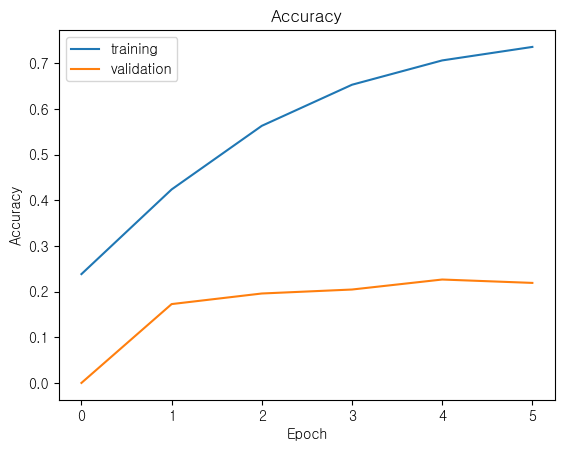

In [133]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [134]:
#저장
model.save('감정_분류/모델/emotion_model_0115.keras')

#불러오기
# model = keras.models.load_model('')

In [135]:
# 학습 이력 저장
import json
with open('감정_분류/모델/history_0115.json', 'w') as f:
    json.dump(hist.history, f)

In [136]:
with open('감정_분류/모델/history_0115.json', 'r') as f:
    print(f.read())

{"loss": [1.8486485481262207, 1.437112808227539, 1.1728726625442505, 0.9729390740394592, 0.8335370421409607, 0.7527371644973755], "accuracy": [0.23845161497592926, 0.42394185066223145, 0.5633102059364319, 0.6533337831497192, 0.7066174745559692, 0.7361956834793091], "val_loss": [3.4580414295196533, 4.1355509757995605, 5.503740310668945, 6.086282253265381, 6.247574806213379, 6.697652816772461], "val_accuracy": [0.0, 0.1727360635995865, 0.19593940675258636, 0.20464067161083221, 0.22655494511127472, 0.21914276480674744]}


In [137]:
import pickle

# 학습 이력 객체 전체 저장
with open('감정_분류/모델/history_0115.pkl', 'wb') as f:
    pickle.dump(hist, f)

# 저장한 학습 이력 로드
# with open('history_GRU_.pkl', 'rb') as f:
#     load_history = pickle.load(f)